## 3 Linear regression

### 3.1.2 Assessing the accuaracy of the CoefficientsEstimates

Let's validate with an example the residual standard error.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
np.random.seed(42) # for reproducibility

First generate one thousand data points, this will represent the population.
Data is generated with random gaussian noise.
Real linear function is given by y = 7.6X -3.3

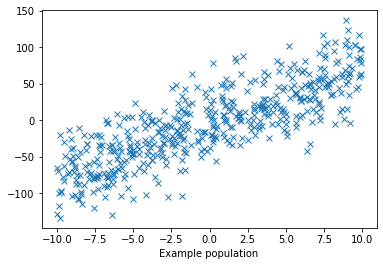

In [30]:
#Number of data points
n = 500
X = np.random.uniform(-10,10, n) 
noise = np.random.normal(0, 30, n) # Gaussian distribution

#This are the real parameters
true_w, true_b = 7.6, -3.3

#Our true function
# y = w * x + b + ε
y = true_w * X + true_b + noise

pop = np.array([X, y])

plt.plot(X, y, 'x');
plt.xlabel('Example population')
plt.show()

To compute the standard error assosiated to the coefitients $\beta_0$ and $\beta_1$ we have the following formulas:

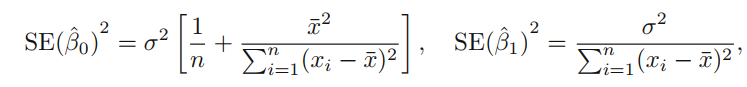

Where $\sigma^2$ = Var($\epsilon$). However, in a normal problem we don't have acces to $\epsilon$, so we have to calculate using the residual error using the next formlas:

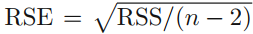 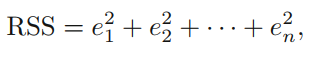 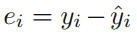

Let's use our generated data, then take N samples K times and check if our RSE estmiate is near to Var($\epsilon$)

#### Plot test data

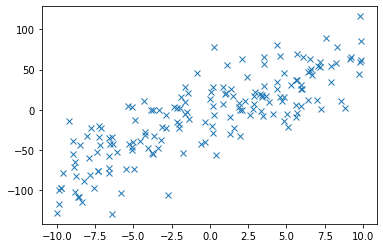

In [41]:
#divide train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65,test_size=0.35)

testSampleSize = y_train.size

plt.plot(X_test, y_test, 'x');

#### Use sklearn to train model using training data

In [42]:
#use scikit learn to calculate the coefficients
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

beta0 = linr.intercept_
beta1 = linr.coef_[0]

print(beta0, beta1)

[-2.8908481] [7.51680733]


Original coefficients are w = 7.3  and b = -3.3. Now lets calculate RSE using above formula. Remember our sample number n is (500 * 0.65) = 325

#### Plot traning data with function obtained from train data

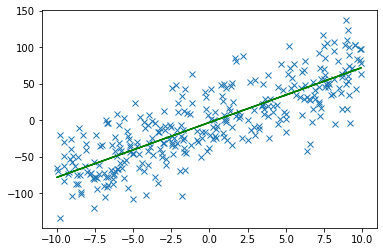

In [43]:
yplot = X_train * beta1 + beta0

plt.plot(X_train, y_train, 'x');
plt.plot(X_train, yplot, 'g')
plt.show()

#### Analyzing error

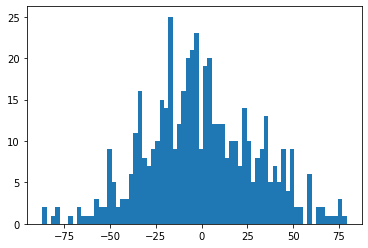

In [44]:
#Plot error distribution
plt.hist(noise, bins=70)
plt.show()

In [45]:
#Error mean
np.mean(noise)

-0.5780042812111096

In [46]:
#Error standard deviation
np.std(noise)

30.059959339128802

In [47]:
#Error vriance
np.var(noise)

903.601155470077

In [64]:
#Evaluate model with calculated coeficients, using sample data.
yHat = X_train * beta1 + beta0

#Calculate error from true y
error = y_train - yHat

#Calculate RSS
rss = np.square(error)
rss = np.sum(rss)
rss

310121.0120516368

#### After getting parameters from sample, plot the error

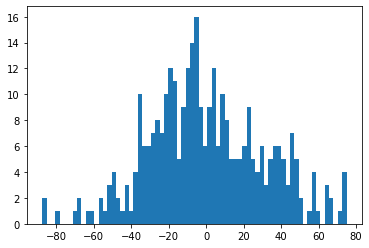

In [63]:
plt.hist(error, bins=70)
plt.show()

In [49]:
#Now calculate RSE
rse = math.sqrt(rss / (testSampleSize-2))
rse

30.985915708529404

In [52]:
#Calculate standard error for beta_1
X_train_median = np.median(X_train)

x_sq_sum = X_train - X_train_median
x_sq_sum = np.square(x_sq_sum)
x_sq_sum = np.sum(x_sq_sum)

beta1_SE = (rse ** 2) / x_sq_sum
beta1_SE

0.08675105202025445

In [65]:
#Calculate standard error for beta_0
beta0_SE = (X_train_median ** 2) / x_sq_sum
beta0_SE = (rse ** 2) * ((1/testSampleSize) + beta0_SE)
beta0_SE

2.9751070777792794

In [66]:

print(f'For beta1, there is a 95% confidence that value is between: {beta1 - (2 * beta1_SE)} and {beta1 + (2 * beta1_SE)}')
print(f'For beta0, there is a 95% confidence that value is between: {beta0 - (2 * beta0_SE)} and {beta0 + (2 * beta0_SE)}')

For beta1, there is a 95% confidence that value is between: [7.34330522] and [7.69030943]
For beta0, there is a 95% confidence that value is between: [-8.84106226] and [3.05936605]


#### Next steps

For beta0, conficence intervals seems to be very high, why?
- Calculations might be wrong
- I used beta0 and beta1 the other way arround
- Write why standar error, and real error are similar using distribution plot